# Twitter Sentiment Analysis using Naive Bayes Classifier

## Setting Up the Environment

Here, we import some required packages and also import the dataset found in data/train_tweets.csv using pandas framework
We do some basic data manipulation like dropping ID column

In [1]:
import pandas as pd # Used for working with dataframes
import numpy as np # Used for numerical analysis
import seaborn as sns # Used for plotting heatmaps and color plots
import matplotlib.pyplot as plt # Used for plotting graphs

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
tweets_df = pd.read_csv('data/train_tweets.csv') # Getting tweets data into tweets_df dataframe using pandas

In [3]:
tweets_df # Checking to see if all data has been imported

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


### The above module was run correctly and shows 31962 rows of data spread across 3 colums

In [4]:
tweets_df.info() # To show information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


### Here we see that there are three columns named id, label and tweet
### We see that every column is filled so we don't have to fill in values

In [5]:
tweets_df.describe() # Used to describe the data in a dataframe

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


### The df.describe() function shows a basic the statistical analysis of the data

In [6]:
# We don't have much use with the ID column
# It can cause further problems in analysis
# So we're going to drop it

tweets_df = tweets_df.drop(['id'], axis = 1) # axis = 1 denotes that the column has to be dropped and not the row

tweets_df # to display the dataframe and verify that the column has been dropped

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


## Understanding the Dataset

Here we take a closer look at the dataset to get an idea of how it is, and further decide on how it should be cleaned

<AxesSubplot:>

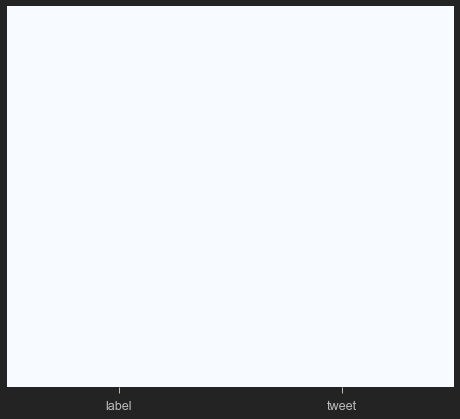

In [7]:
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
#This is to show if there are any null elements in the dataset 
# isnull() function checks for null elements

/home/anandnair/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

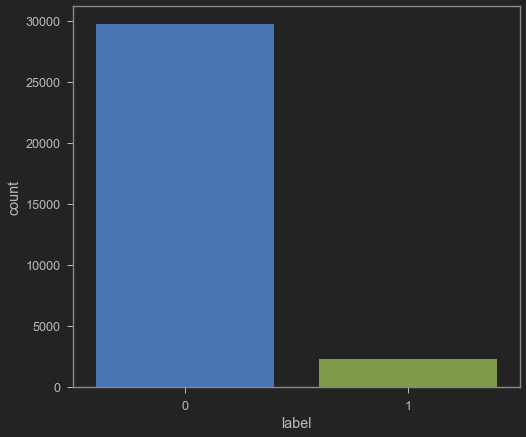

In [8]:
sns.countplot(tweets_df['label'], label = 'Count') # Plotting the frequency of the labels

### From the above graph we get the same result as before. It is an unbalanced dataset and positive tweets are 12-15 times the negative tweets

<AxesSubplot:ylabel='Frequency'>

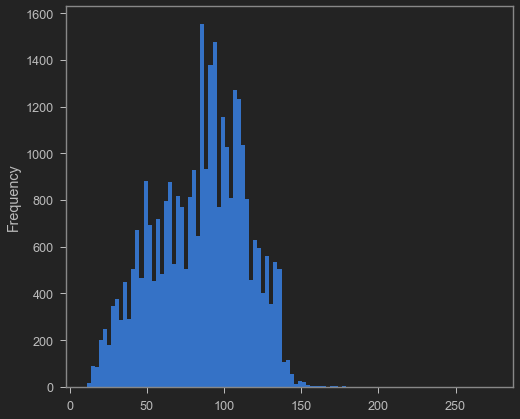

In [9]:
# Now we can think of new features to add to the dataset
# The length of each tweet could be a good feature

tweets_df['length'] = tweets_df['tweet'].apply(len) # df.apply(func_name) applies the given function to each and every element in the given row

tweets_df['length'].plot(bins=100, kind='hist') # Just plotting to see the length of tweets

In [10]:
# Since we have added a new column to the tweets dataframe, let us analyse it again using df.describe()
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


### Using describe() again gives us knowledge on the statistical quatities related to the length of each tweet

In [11]:
# Let us try to display the tweet with minimum average and maximum lengths

print("Min Length:\n{}".format(tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]))
print('\n')
print("Max Length:\n{}".format(tweets_df[tweets_df['length'] == 274]['tweet'].iloc[0]))
print('\n')
print("Average Length:\n{}".format(tweets_df[tweets_df['length'] == 85]['tweet'].iloc[0]))

Min Length:
i love you 


Max Length:
 @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ðððððððððððð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð±ð±ð¤ð¤ð±ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ðððððððâ¦


Average Length:
 â #under the spell of brexit referendum - commerzbank   #blog #silver #gold #forex


# Plotting a Word Cloud
### A Word Could is to be plotted for each of the whole set, negative tweets and positive tweets

In [12]:
from wordcloud import WordCloud
# To import necessary package for plotting word clouds

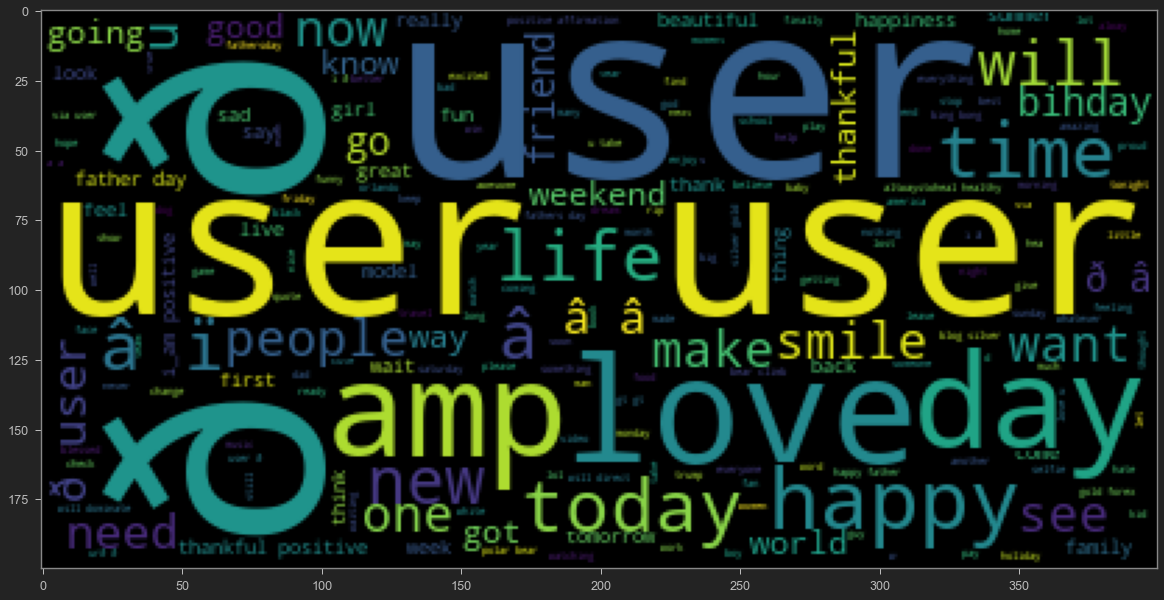

In [13]:
all_sentences = tweets_df['tweet'].tolist() # This function takes in the tweet column and converts it into a list of strings
all_sentences_as_a_string = " ".join(all_sentences) # Join all sentences into a single big string

plt.figure(figsize = (20,20)) # Setting the figure size
plt.imshow(WordCloud().generate(all_sentences_as_a_string)) # Plots a wordcloud

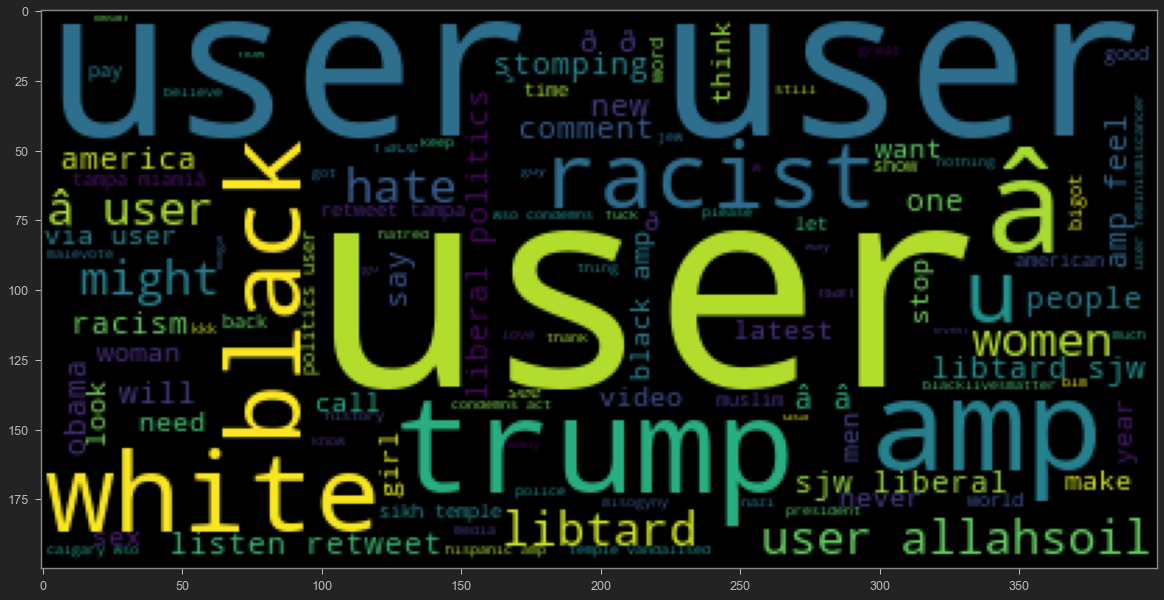

In [14]:
negative_tweets = tweets_df[tweets_df['label'] == 1] # Takes the dataset of only negative tweets
n_sentences = negative_tweets['tweet'].tolist() # This function takes in the tweet column and converts it into a list of strings
n_sentences_as_a_string = " ".join(n_sentences) # Join all sentences into a single big string

plt.figure(figsize = (20,20)) # Setting the figure size
plt.imshow(WordCloud().generate(n_sentences_as_a_string)) # Plots a wordcloud

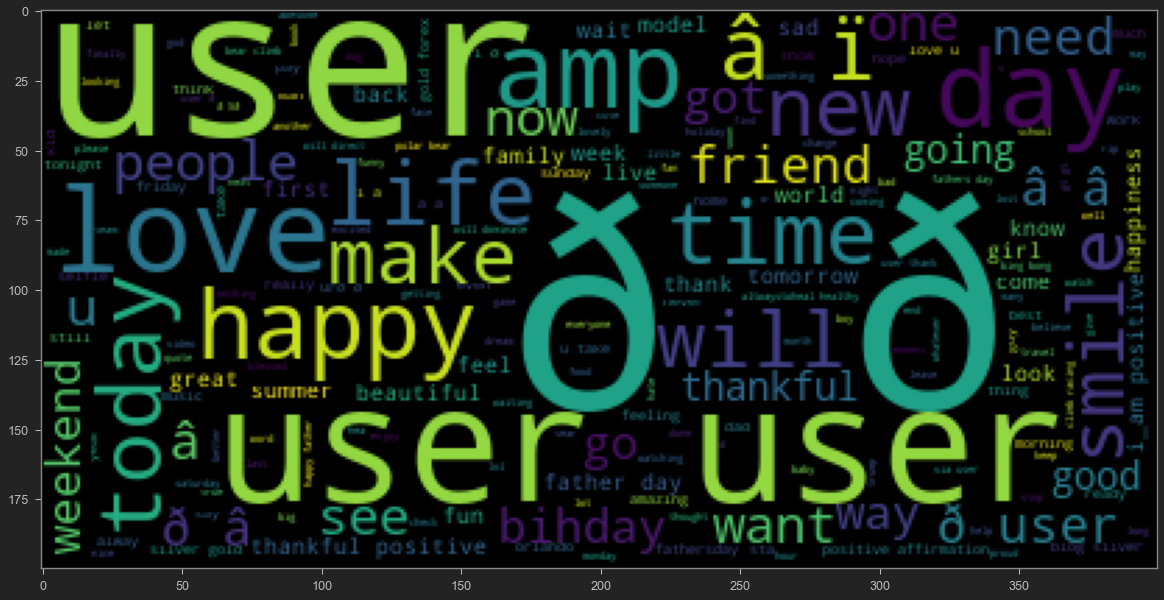

In [15]:
positive_tweets = tweets_df[tweets_df['label'] == 0] # Takes the dataset of only positive tweets
p_sentences = positive_tweets['tweet'].tolist() # This function takes in the tweet column and converts it into a list of strings
p_sentences_as_a_string = " ".join(p_sentences) # Join all sentences into a single big string

plt.figure(figsize = (20,20)) # Setting the figure size
plt.imshow(WordCloud().generate(p_sentences_as_a_string)) # Plots a wordcloud

### From the above wordclouds we can clearly see the difference between positive and negative tweets
### But there are a few words which don't mean much in either scenario and are mostly junk
### We'll clean the data now

# Data Cleaning

### Here, we create a pipeline that will clean the data in three ways
> - Removing Punctuation
>
> - Removing Stop Words
>
> - Count Vectorisation/Tokenisation

In [18]:
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Importing some packages required for Data Cleaning

In [19]:
def message_cleaning(message):
    message_punc_removed = [char for char in message if char not in string.punctuation]
    message_punc_removed_join = ''.join(message_punc_removed)
    message_clean = [word for word in message_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return message_clean

In [20]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [21]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [23]:
tweets_df_clean

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, cant, use, ...
2                                        [bihday, majesty]
3        [model, love, u, take, u, time, urð±, ðð...
4                        [factsguide, society, motivation]
                               ...                        
31957    [ate, user, isz, youuuðððððð...
31958    [see, nina, turner, airwaves, trying, wrap, ma...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [user, sikh, temple, vandalised, calgary, wso,...
31961                                [thank, user, follow]
Name: tweet, Length: 31962, dtype: object

### Above we can see that the clean data contains no punctuations nor stopwords
### Now we have to tokenise the words

In [30]:
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['tweet']).toarray()

In [33]:
print(tweets_countvectorizer.shape)

(31962, 47386)


## NAIVE BAYES CLASSIFIER

### Now we train and test a Naive Bayes Classifier and output the scores

In [34]:
x = tweets_countvectorizer

In [35]:
y = tweets_df['label']

In [36]:
x.shape

(31962, 47386)

In [37]:
y.shape

(31962,)

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

# Helps split the data into train and test

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NBclassifier = MultinomialNB()
NBclassifier.fit(x_train, y_train

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = NBclassifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(Y_test, Y_prediction_test))